In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Missing values in the data set')

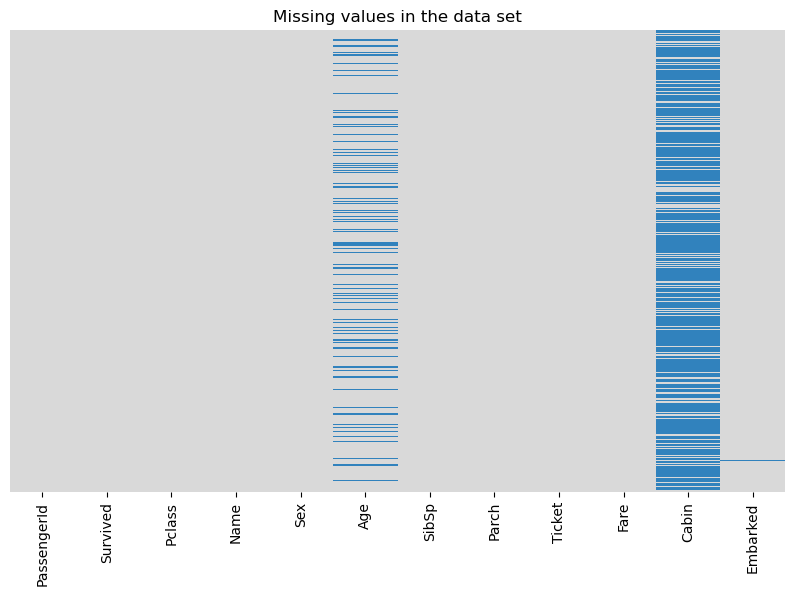

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels= False, cbar= False, cmap= "tab20c_r")
plt.title("Missing values in the data set")


<Axes: xlabel='Pclass', ylabel='Age'>

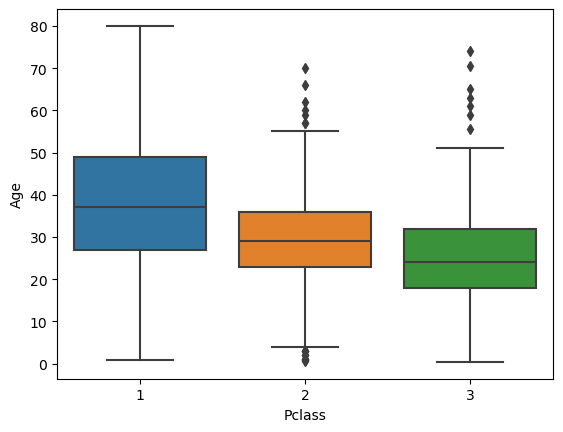

In [5]:
sns.boxplot(x= 'Pclass', y="Age", data=df)

In [6]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37

        elif Pclass == 2:

            return 29

        else:
            return 24

    else:
        return Age

# Apply the function to the Age column
df['Age']=df[['Age','Pclass']].apply(impute_age, axis =1 )
            

C:\Users\PMLS\AppData\Local\Temp\ipykernel_4416\4008720949.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = col[0]
C:\Users\PMLS\AppData\Local\Temp\ipykernel_4416\4008720949.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = col[1]


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'Missing values in the data set')

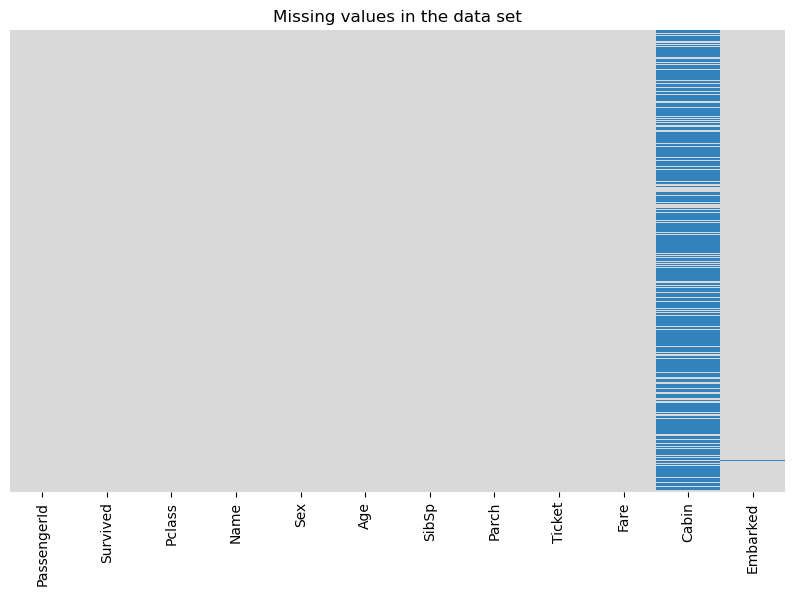

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels= False, cbar= False, cmap= "tab20c_r")
plt.title("Missing values in the data set")


In [9]:
df.drop('Cabin',axis=1,inplace=True)

Text(0.5, 1.0, 'Missing values in the data set')

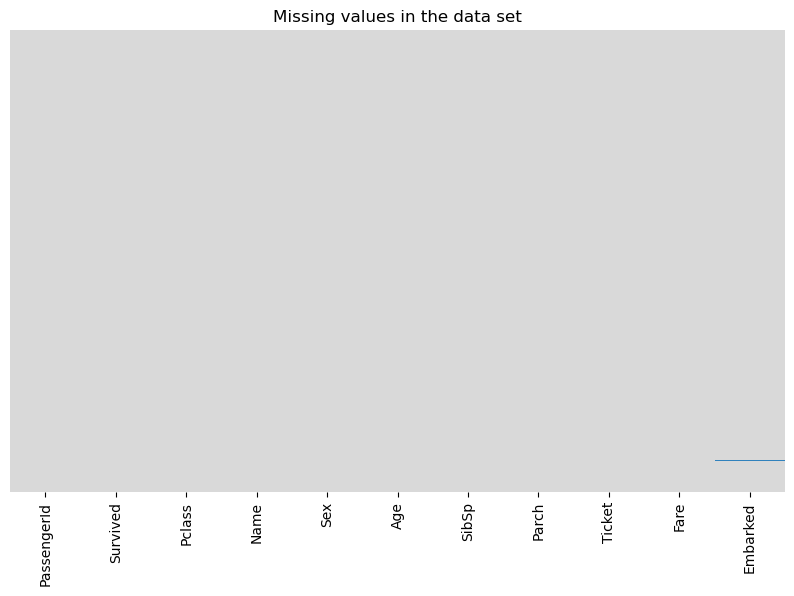

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels= False, cbar= False, cmap= "tab20c_r")
plt.title("Missing values in the data set")


In [11]:
df.dropna(inplace=True)

Text(0.5, 1.0, 'Missing values in the data set')

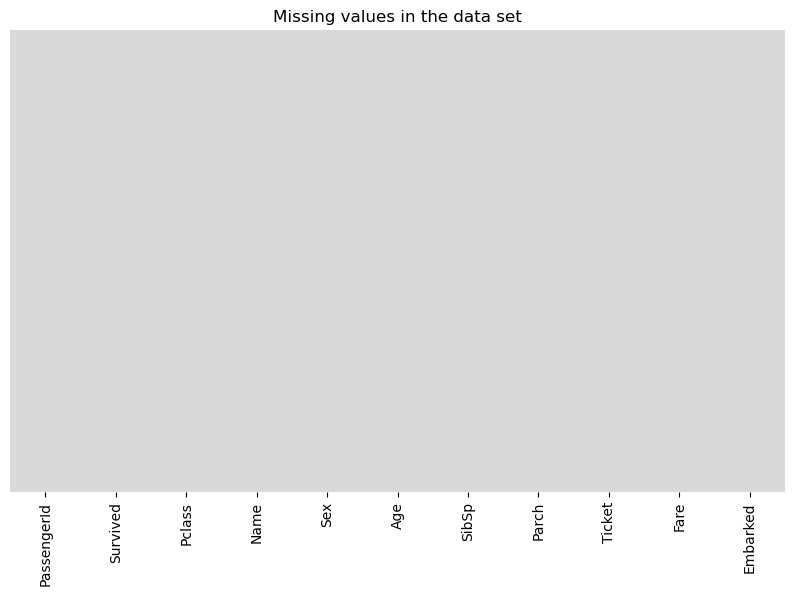

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels= False, cbar= False, cmap= "tab20c_r")
plt.title("Missing values in the data set")


In [13]:
df.shape

(889, 11)

In [14]:
df.drop(df[['Name','Ticket','Embarked']], axis = 1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Gender' column
df['Sex'] = le.fit_transform(df['Sex'])

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop("Survived" , axis = 1)
Y = df['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(711, 7) (178, 7) (711,) (178,)


In [18]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train, Y_train)


c:\Users\PMLS\miniconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
Y_predict = lgr.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
lgr_accuracy = round(accuracy_score(Y_test, Y_predict) * 100,2)
print('Accuracy', lgr_accuracy,'%')

Accuracy 79.78 %


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)


GradientBoostingClassifier()

In [22]:
Y_predict = gbc.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
gbc_accuracy = round(accuracy_score(Y_test, Y_predict) * 100,2)
print('Accuracy', gbc_accuracy,'%')

Accuracy 82.02 %
